In [ ]:
pip install pmdarima

In [ ]:
import pandas as pd
import numpy as np

#Read Data

In [ ]:
df=pd.read_csv('/content/measurements (2).csv',parse_dates=True)
#df=df.dropna()
#df.index_col = pd.to_datetime(df.DATE, errors='coerce')
df['DATE']= pd.to_datetime(df['DATE'])
df.set_index("DATE", inplace = True)
df.info()
#df1['Date']= pd.to_datetime(df['Date'])
print('Shape of data',df.shape)
#print(df.DATE)
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 33876 entries, 2019-03-21 08:00:00+00:00 to 2021-01-30 08:15:00+00:00
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 1  0 non-null      float64
 1   parameter   33876 non-null  object 
 2   value       33876 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.0+ MB
Shape of data (33876, 3)


Unnamed: 1 parameter  value
DATE                                                  
2019-03-21 08:00:00+00:00         NaN      pm25  107.0
2019-03-22 06:00:00+00:00         NaN      pm25   88.0
2019-03-22 08:15:00+00:00         NaN      pm25   57.0
2019-03-23 09:15:00+00:00         NaN      pm25   83.0
2019-03-23 10:15:00+00:00         NaN      pm25   56.0

In [ ]:
from google.colab import files
uploaded = files.upload()

#Plot Your Data

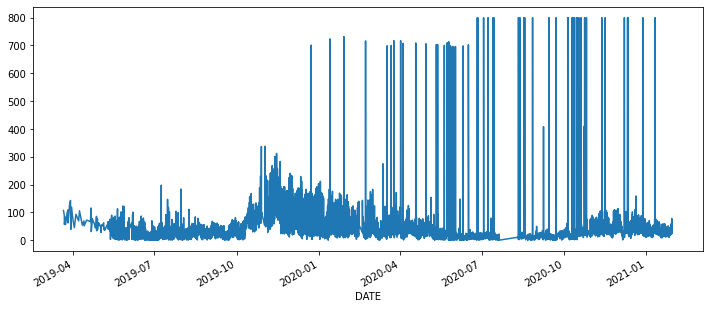

In [ ]:
df['value'].plot(figsize=(12,5))

#Check For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['value'])

1. ADF :  -11.929742299906758
2. P-Value :  4.812554386574585e-22
3. Num Of Lags :  45
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 33830
5. Critical Values :
	 1% :  -3.4305433135162935
	 5% :  -2.861625439704114
	 10% :  -2.566815476885392


#Figure Out Order for ARIMA Model

In [ ]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit = auto_arima(df['value'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                33876
Model:               SARIMAX(0, 1, 5)   Log Likelihood             -170428.294
Date:                Fri, 18 Jun 2021   AIC                         340868.589
Time:                        20:39:19   BIC                         340919.171
Sample:                             0   HQIC                        340884.725
                              - 33876                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3768      0.001   -552.422      0.000      -0.378      -0.375
ma.L2         -0.2909      0.001   -215.097      0.000      -0.294      -0.288
ma.L3         -0.1583      0.002    -93.646      0.000      -0.162      -0.155
ma.L4         -0.0717      0.002    -30.059      0.000      -0.076      -0.067
ma.L5         -0.0735      0.002    -30.321      0.000      -0.078      -0.069
sigma2      1372.2747      1.133   1210.691      0.000    1370.053    1374.496
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):          49217053.60
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):              18.19   Skew:                             6.68
Prob(H) (two-sided):                  0.00   Kurtosis:                       189.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(train.iloc[0],train.iloc[-1])
print(test.iloc[0],test.iloc[-1])
#print(test)

(33876, 3)
(33846, 3) (30, 3)
Unnamed: 1     NaN
parameter     pm25
value          107
Name: 2019-03-21 08:00:00+00:00, dtype: object Unnamed: 1      NaN
parameter      pm25
value         34.94
Name: 2021-01-29 07:45:00+00:00, dtype: object
Unnamed: 1     NaN
parameter     pm25
value           36
Name: 2021-01-29 08:15:00+00:00, dtype: object Unnamed: 1     NaN
parameter     pm25
value         24.8
Name: 2021-01-30 08:15:00+00:00, dtype: object


## Train the Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['value'],order=(0,1,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.value   No. Observations:                33845
Model:                 ARIMA(0, 1, 5)   Log Likelihood             -170290.712
Method:                       css-mle   S.D. of innovations             37.059
Date:                Fri, 18 Jun 2021   AIC                         340595.425
Time:                        20:53:42   BIC                         340654.432
Sample:                             1   HQIC                        340614.250
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0008      0.006     -0.132      0.895      -0.012       0.011
ma.L1.D.value    -0.3769      0.005    -69.116      0.000      -0.388      -0.366
ma.L2.D.value    -0.2910      0.006    -51.140      0.000      -0.302      -0.280
ma.L3.D.value    -0.1583      0.006    -25.718      0.000      -0.170      -0.146
ma.L4.D.value    -0.0717      0.006    -12.307      0.000      -0.083      -0.060
ma.L5.D.value    -0.0735      0.005    -14.163      0.000      -0.084      -0.063
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0136           -0.0000j            1.0136           -0.0000
MA.2           -1.5173           -1.0734j            1.8586           -0.4020
MA.3           -1.5173           +1.0734j            1.8586            0.4020
MA.4            0.5225           -1.9014j            1.9719           -0.2073
MA.5            0.5225           +1.9014j            1.9719            0.2073
-----------------------------------------------------------------------------
"""

#Make Predictions on Test Set

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to cplot a graph
#df["Date"]= pd.to_datetime(df.["Date"])
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#print(index_future_dates)
#pred.index=index_future_dates
pred.index=df.index[start:end+1]
print(pred)
#pred.plot(legend=True)
#test['Apr-20'].plot(legend=True)


DATE
2021-01-29 08:15:00+00:00    32.443862
2021-01-29 09:45:00+00:00    31.072641
2021-01-29 10:15:00+00:00    30.449478
2021-01-29 10:45:00+00:00    30.210199
2021-01-29 11:00:00+00:00    29.957557
2021-01-29 11:15:00+00:00    29.956791
2021-01-29 11:45:00+00:00    29.956026
2021-01-29 12:45:00+00:00    29.955260
2021-01-29 15:15:00+00:00    29.954495
2021-01-29 15:45:00+00:00    29.953729
2021-01-29 16:15:00+00:00    29.952964
2021-01-29 16:45:00+00:00    29.952198
2021-01-29 17:45:00+00:00    29.951432
2021-01-29 19:00:00+00:00    29.950667
2021-01-29 19:15:00+00:00    29.949901
2021-01-29 21:15:00+00:00    29.949136
2021-01-29 21:45:00+00:00    29.948370
2021-01-29 22:15:00+00:00    29.947605
2021-01-30 00:45:00+00:00    29.946839
2021-01-30 01:00:00+00:00    29.946073
2021-01-30 01:15:00+00:00    29.945308
2021-01-30 03:45:00+00:00    29.944542
2021-01-30 04:15:00+00:00    29.943777
2021-01-30 05:00:00+00:00    29.943011
2021-01-30 05:15:00+00:00    29.942246
2021-01-30 06:15:00+

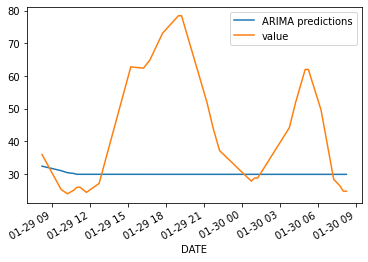

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['value'].plot(legend=True)

In [ ]:
test['value'].mean()

42.977666666666664

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['value']))
print(rmse)


22.426885601030676


In [ ]:
model2=ARIMA(df['value'],order=(0,1,5))
model2=model2.fit()
df.tail()

Unnamed: 1 parameter  value
DATE                                                  
2021-01-30 06:15:00+00:00         NaN      pm25  49.60
2021-01-30 07:15:00+00:00         NaN      pm25  28.40
2021-01-30 07:45:00+00:00         NaN      pm25  26.39
2021-01-30 08:00:00+00:00         NaN      pm25  24.80
2021-01-30 08:15:00+00:00         NaN      pm25  24.80

#For Future Dates

In [ ]:
#index_future_dates=pd.date_range(start='2020-04-18 23:59:56+00:00',end='2020-04-20 16:19:51+00:00')
#print(index_future_dates)
#print('Shape of data',index_future_dates.shape)
pred=model2.predict(start=len(df),end=len(df)+499,typ='levels').rename('ARIMA Predictions')
#pred.index=df.index[start:end+1]
print(pred)
#pred.index=index_future_dates
#print(pred)

33875    29.043985
33876    32.087385
33877    33.253952
33878    33.864483
33879    34.148080
           ...    
34370    33.833114
34371    33.832473
34372    33.831831
34373    33.831190
34374    33.830548
Name: ARIMA Predictions, Length: 500, dtype: float64


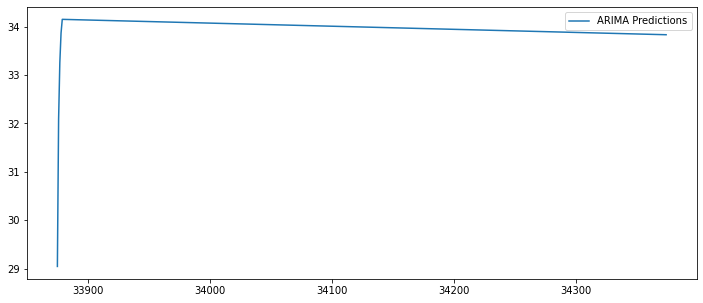

In [ ]:
pred.plot(figsize=(12,5),legend=True)
